<a href="https://colab.research.google.com/github/Samplerbhavanigithub/FMML-2023_PROJECTS_AND_ASSIGNMENTS/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

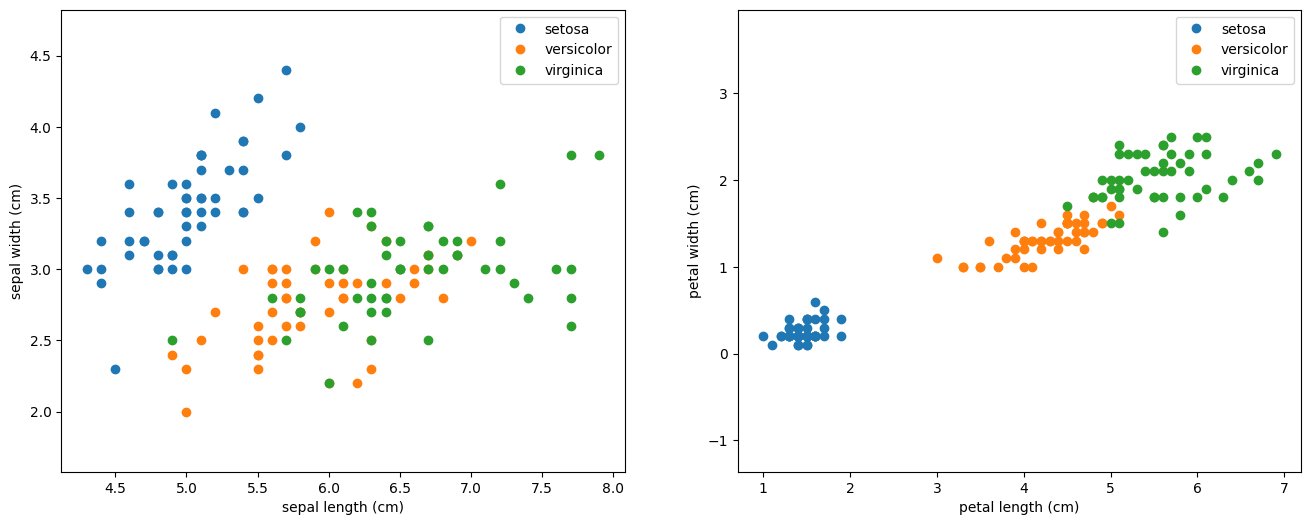

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 317.28it/s]


# Plot training progress

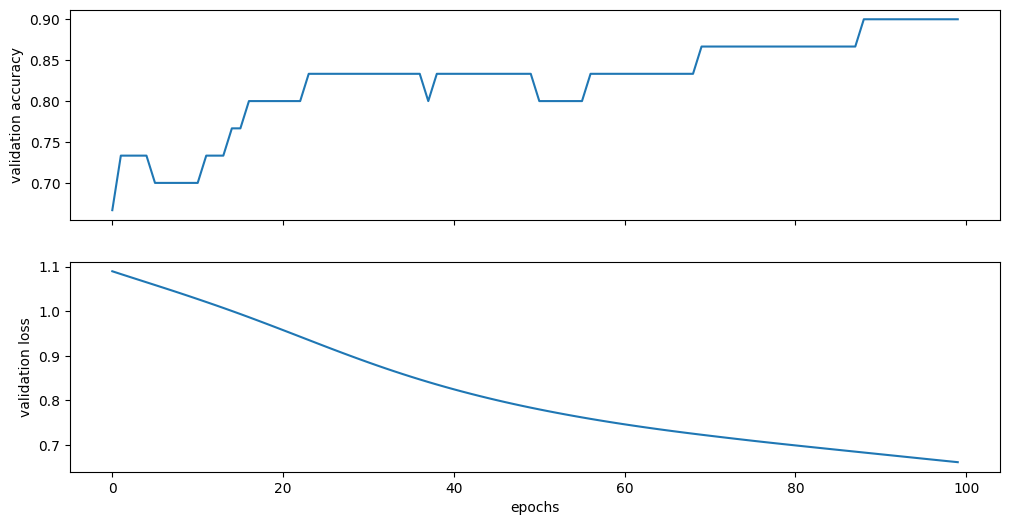

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

** try changing the number of hidden layers**

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset (for demonstration, let's use a simple synthetic dataset)
# Replace this with your dataset loading code
# For example:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# For demonstration purposes, let's create a simple synthetic dataset
import numpy as np
x_train = np.random.random((1000, 20))  # 1000 samples, 20 features
y_train = np.random.randint(2, size=(1000, 1))  # Binary labels
x_test = np.random.random((100, 20))  # 100 samples, 20 features
y_test = np.random.randint(2, size=(100, 1))  # Binary labels

# Define a function to create and compile the model with variable number of hidden layers
def create_model(num_hidden_layers):
    model = models.Sequential()
    model.add(layers.Input(shape=(20,)))  # Input layer

    # Add hidden layers
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(64, activation='relu'))

    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer (binary classification)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Train models with different numbers of hidden layers
num_hidden_layers_list = [1, 2, 3]  # Try different numbers of hidden layers
for num_hidden_layers in num_hidden_layers_list:
    print(f"\nTraining model with {num_hidden_layers} hidden layer(s)")
    model = create_model(num_hidden_layers)
    model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))



Training model with 1 hidden layer(s)
Epoch 1/10
32/32 [==============================] - 1s 11ms/step - loss: 0.7056 - accuracy: 0.4980 - val_loss: 0.6820 - val_accuracy: 0.5500
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5150 - val_loss: 0.6769 - val_accuracy: 0.5400
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.5340 - val_loss: 0.6787 - val_accuracy: 0.5600
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5350 - val_loss: 0.6732 - val_accuracy: 0.6200
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6866 - accuracy: 0.5490 - val_loss: 0.6727 - val_accuracy: 0.6100
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.5490 - val_loss: 0.6711 - val_accuracy: 0.6400
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.5550 - val_loss: 0.6716 - v

**Try changing the number of neurons in the hidden layer.**

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset (for demonstration, let's use a simple synthetic dataset)
# Replace this with your dataset loading code
# For example:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# For demonstration purposes, let's create a simple synthetic dataset
import numpy as np
x_train = np.random.random((1000, 20))  # 1000 samples, 20 features
y_train = np.random.randint(2, size=(1000, 1))  # Binary labels
x_test = np.random.random((100, 20))  # 100 samples, 20 features
y_test = np.random.randint(2, size=(100, 1))  # Binary labels

# Define a function to create and compile the model with variable number of neurons in the hidden layer
def create_model(num_neurons):
    model = models.Sequential([
        layers.Input(shape=(20,)),  # Input layer
        layers.Dense(num_neurons, activation='relu'),  # Hidden layer
        layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Train models with different numbers of neurons in the hidden layer
num_neurons_list = [32, 64, 128]  # Try different numbers of neurons
for num_neurons in num_neurons_list:
    print(f"\nTraining model with {num_neurons} neurons in the hidden layer")
    model = create_model(num_neurons)
    model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))



Training model with 32 neurons in the hidden layer
Epoch 1/10
32/32 [==============================] - 1s 10ms/step - loss: 0.6982 - accuracy: 0.5240 - val_loss: 0.7033 - val_accuracy: 0.4800
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5290 - val_loss: 0.7023 - val_accuracy: 0.4900
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.5470 - val_loss: 0.7030 - val_accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6894 - accuracy: 0.5420 - val_loss: 0.7038 - val_accuracy: 0.4800
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6871 - accuracy: 0.5520 - val_loss: 0.7048 - val_accuracy: 0.4700
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5560 - val_loss: 0.7061 - val_accuracy: 0.4800
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5510 - val_los

**Try using a different activation function.**

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset (for demonstration, let's use a simple synthetic dataset)
# Replace this with your dataset loading code
# For example:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train = x_train / 255.0
# x_test = x_test / 255.0

# For demonstration purposes, let's create a simple synthetic dataset
import numpy as np
x_train = np.random.random((1000, 20))  # 1000 samples, 20 features
y_train = np.random.randint(2, size=(1000, 1))  # Binary labels
x_test = np.random.random((100, 20))  # 100 samples, 20 features
y_test = np.random.randint(2, size=(100, 1))  # Binary labels

# Define a function to create and compile the model with different activation functions in the hidden layer
def create_model(activation_function):
    model = models.Sequential([
        layers.Input(shape=(20,)),  # Input layer
        layers.Dense(64, activation=activation_function),  # Hidden layer with specified activation function
        layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Train models with different activation functions in the hidden layer
activation_functions = ['relu', 'tanh', 'sigmoid']  # Try different activation functions
for activation_function in activation_functions:
    print(f"\nTraining model with '{activation_function}' activation function in the hidden layer")
    model = create_model(activation_function)
    model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))



Training model with 'relu' activation function in the hidden layer
Epoch 1/10
32/32 [==============================] - 1s 15ms/step - loss: 0.6925 - accuracy: 0.5200 - val_loss: 0.7034 - val_accuracy: 0.4500
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6897 - accuracy: 0.5380 - val_loss: 0.7048 - val_accuracy: 0.4200
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6887 - accuracy: 0.5330 - val_loss: 0.7049 - val_accuracy: 0.4100
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5280 - val_loss: 0.7033 - val_accuracy: 0.4100
Epoch 5/10
32/32 [==============================] - 0s 8ms/step - loss: 0.6841 - accuracy: 0.5600 - val_loss: 0.7023 - val_accuracy: 0.4300
Epoch 6/10
32/32 [==============================] - 0s 8ms/step - loss: 0.6836 - accuracy: 0.5670 - val_loss: 0.7032 - val_accuracy: 0.4700
Epoch 7/10
32/32 [==============================] - 0s 10ms/step - loss: 0.6824 - accuracy: